# Introduction

Gumbi simplifies the steps needed to build a Gaussian Process model from tabular data. It takes care of shaping,
transforming, and standardizing data as necessary while applying best practices and sensible defaults to the
construction of the GP model itself. Taking inspiration from popular packages such as
__[Bambi](https://bambinos.github.io/bambi/main/index.html)__ and __[Seaborn](https://seaborn.pydata.org/index.html)__,
Gumbi's aim is to allow quick iteration on both model structure and prediction visualization. Gumbi is primarily built
on top of __[PyMC3](https://docs.pymc.io/)__, though additional support for __[GPflow](https://gpflow.readthedocs.io/)__
is planned.

## Quickstart

Read in some data and store it as a Gumbi `DataSet`:


In [1]:
import gumbi as gmb
import seaborn as sns
cars = sns.load_dataset('mpg').dropna()
ds = gmb.DataSet(cars, outputs=['mpg', 'acceleration'], log_vars=['mpg', 'acceleration', 'horsepower'])


Create a Gumbi `GP` object and fit a model that predicts *mpg* from *horsepower*:

In [2]:
gp = gmb.GP(ds)
gp.fit(outputs=['mpg'], continuous_dims=['horsepower']);


Make predictions and plot!

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

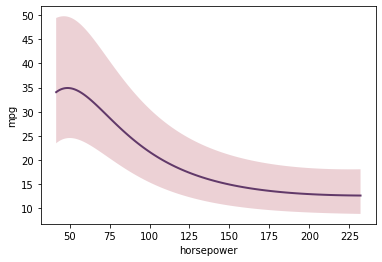

In [3]:
X = gp.prepare_grid()
y = gp.predict_grid()
gmb.ParrayPlotter(X, y).plot()


More complex GPs are also possible, such as correlated multi-input and multi-output systems, demonstrated in the example notebooks.

## Installation
### Via pip

    pip install gumbi

### Bleeding edge

    pip install git+git://github.com/JohnGoertz/Gumbi.git@develop

### Local development

* Clone the repo and navigate to the new directory

  * `git clone https://gitlab.com/JohnGoertz/gumbi gumbi`

  * `cd gumbi`

* Create a new conda environment using mamba

  * `conda install mamba`

  * `mamba install -f gumbi_env.yaml`

* Install `gumbi` via `pip` in editable/development mode

  * From within the `gumbi` repo

  * `pip install --editable ./`

* To update the `gumbi` module

  * From within the `gumbi` repo

  * `git pull`
